# Data exploration: Lunar images

Thejll, Peter; Gleisner, Hans; Flynn, Chris (2016), “Lunar images using Earthshine telescopes”, Mendeley Data, V1, doi: 10.17632/67tyxkj4sh.1

In [41]:
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATA_PATH = '../data/'

## Read Data

In [3]:
lunar_images_list = fits.open(DATA_PATH+'2456045.7861532MOON_B_AIR.fits')

In [4]:
lunar_images_list.info()

Filename: ../data/2456045.7861532MOON_B_AIR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      77   (512, 512, 100)   int32   


In [5]:
lunar_image = lunar_images_list[0]

In [6]:
lunar_image.data.shape

(100, 512, 512)

In [7]:
lunar_image.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
NAXIS3  =                  100 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HEAD    = 'DU897_BV'           / Head model                                     
ACQMODE = 'Kinetics'           / Acquisition mode                               
ACT     =              0.42461 / Integration cycle time                         
KCT     =              0.424

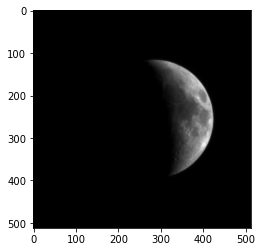

In [8]:
plt.imshow(lunar_image.data[0,:,:], cmap='gray')

In [9]:
lunar_image.header['EXPOSURE']

0.1166

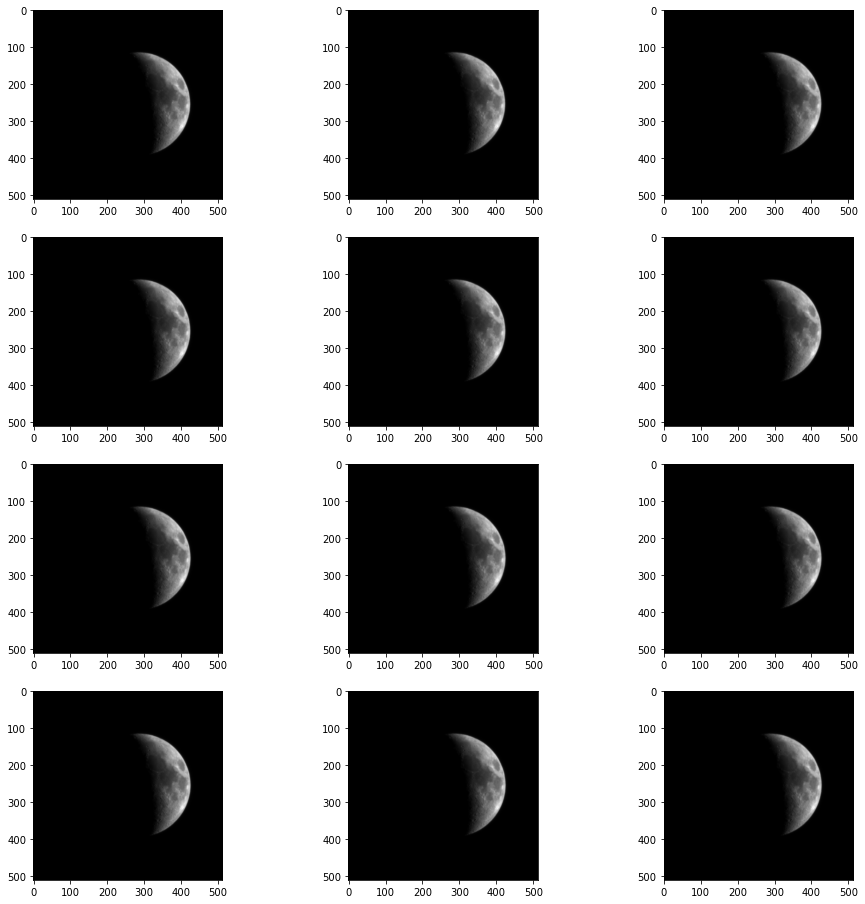

In [10]:
fig, axs = plt.subplots(4,3, figsize=(16,16))

index = 0
for i in range(4):
    for j in range(3):
        axs[i, j].imshow(lunar_image.data[index*8,:,:], cmap='gray')
        index+=1


In [11]:
type(lunar_image.data[0,:,:])

numpy.ndarray

## Creating Mask

In [69]:
base = lunar_image.data[0,:,:].byteswap()
last = lunar_image.data[99,:,:]

In [70]:
np.max(base)

2141847552

In [71]:
np.min(base)

-2147352576

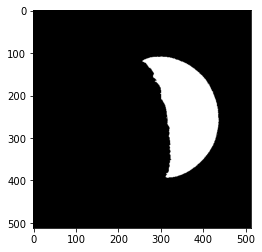

In [76]:
plt.imshow(np.where(lunar_image.data[0,:,:]> 500,1,0), cmap='gray')